In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import io

In [ ]:
# .parquet 파일 읽기
file_path = '/content/drive/MyDrive/Colab Notebooks/딥러닝응용1/기말범위/data/train-00000-of-00001-c08a401c53fe5312.parquet'
df = pd.read_parquet(file_path)

In [ ]:
img_list = []
for i in range(len(df)):
  image_data = df.iloc[i]['image']['bytes']
  image_data = Image.open(io.BytesIO(image_data))
  img_list.append(image_data)

label_list = []
for i in range(len(df)):
  label_data = df.iloc[i]['label']
  label_list.append(label_data)

label_array = np.array(label_list)
img_array = np.array([*img_list])



from sklearn.model_selection import train_test_split

img_array = img_array / 255.0
train_images, test_images, train_labels, test_labels = train_test_split(img_array, label_array, test_size=0.2, random_state=42)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(4096, 128, 128) (4096,)
(1024, 128, 128) (1024,)


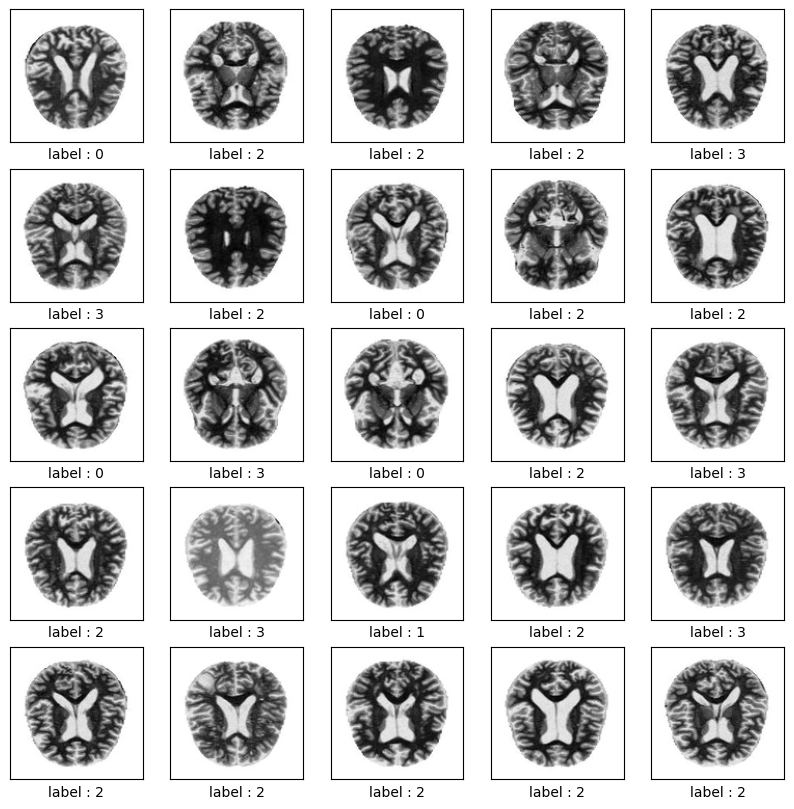

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel('label : {}'.format(train_labels[i]))
plt.show()

In [ ]:
train_images = train_images[:,:,:,np.newaxis]
train_images = train_images.astype("float32")
test_images = test_images[:,:,:,np.newaxis]
test_images = test_images.astype("float32")
# train_images.shape
test_images.shape

(1024, 128, 128, 1)

## 모델

In [ ]:
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import keras

def build_model(input_shape, num_out):
    inputs = keras.Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = MaxPool2D(pool_size=2)(x)
    x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = MaxPool2D(pool_size=2)(x)
    x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = Flatten()(x)
    outputs = Dense(num_out, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    return model

#model = build_model((128,128,1),4) #t사진흑백임
model = build_model(train_images.shape[1:],4)

model.summary()

## 인풋으로 마지막에 사진한장만넣네? 배치는 컴파일때하나봄.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         401,412 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,084 (1.88 MB)

 Trainable params: 494,084 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4804 - loss: 1.1977
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5472 - loss: 0.9726
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6003 - loss: 0.8697
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6771 - loss: 0.7170
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7877 - loss: 0.5283
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8509 - loss: 0.3942
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9171 - loss: 0.2548
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9251 - loss: 0.1875
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9588 - loss: 0.1168
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9802 - loss: 0.0618
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9773 - loss: 0.0715
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy:

In [ ]:
model.evaluate(test_images, test_labels)